In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('G:\нейро_лабс\Lab_5\creditcard.csv')

data['Class'].value_counts()

In [3]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

In [29]:
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [31]:
X = data.drop('Class', axis=1)
y = data['Class']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test) 

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [8]:
y_train_imputed = y_train.fillna(y_train.mean())

In [9]:
print("Number of NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Number of NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum())

Number of NaN values in X_train_scaled: 0
Number of NaN values in X_test_scaled: 0


In [10]:
threshold = 0.5 

# Создаем двоичную метку для обучающих данных
y_train_binary = (y_train_imputed > threshold).astype(int)

# Обучение модели и оценка производительности
model = SVC()  # Выбираем модель SVC
model.fit(X_train_scaled, y_train_binary)  # Обучаем модель

# Получение вероятностей мошенничества для тестовых данных
y_pred_scores = model.decision_function(X_test_scaled)
# Нормализация оценок до вероятностей
y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())

# Пороговая обработка вероятностей для получения предсказанных меток
y_pred = (y_pred_proba > threshold).astype(int)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Вычисление точности и полноты с помощью кривой точности-полноты
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Сохранение результатов оценки производительности
results = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}

In [11]:
results['confusion_matrix']

array([[56862,     2],
       [   38,    60]], dtype=int64)

In [12]:
results['precision_recall_auc']

0.8525431122584858

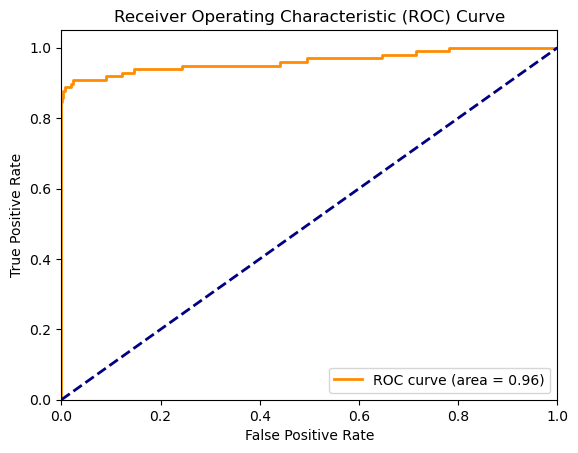

In [13]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.61      0.75        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
from sklearn.neighbors import LocalOutlierFactor

# Обучение модели и оценка производительности
model_LOF = LocalOutlierFactor(novelty=True)  # Создаем экземпляр модели LOF
model_LOF.fit(X_train_scaled)  # Обучаем модель на обучающих данных

# Оцениваем аномальность для тестовых данных
y_pred_scores = -model_LOF.score_samples(X_test_scaled)  # Чем меньше оценка, тем больше аномальность
y_pred_proba = (y_pred_scores - y_pred_scores.min()) / (y_pred_scores.max() - y_pred_scores.min())  # Нормализуем оценки

# Применяем пороговую обработку к вероятностям для получения предсказанных меток
y_pred = (y_pred_proba > threshold).astype(int)

# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)

# Вычисляем точность и полноту с помощью кривой точности-полноты
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Сохраняем результаты оценки производительности
results = {'confusion_matrix': cm, 'precision_recall_auc': pr_auc}


In [16]:
results['confusion_matrix']

array([[56862,     2],
       [   98,     0]], dtype=int64)

In [17]:
results['precision_recall_auc']

0.003218144118464262

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



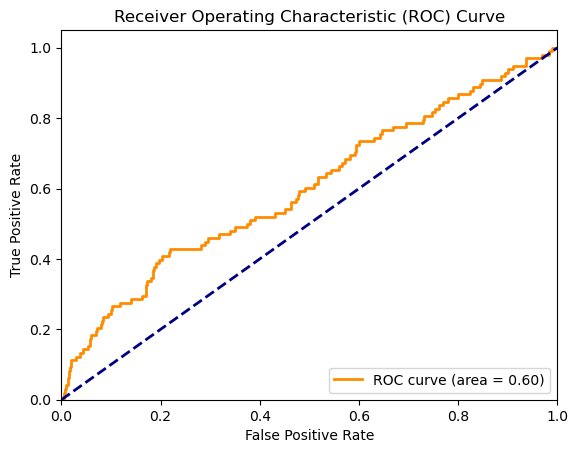

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0
